# 1. Import Library

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Machine Learning Algorithms and Evaluation
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, confusion_matrix, precision_recall_fscore_support)
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV


In [2]:
!pip install ppscore


In [3]:
import ppscore as pps

# 2. Load Dataset

In [4]:
# Menghubungkan Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path file CSV di Google Drive
file_path = '/content/drive/My Drive/JAP Rakamin/Predict Customer Clicked Ads Classification by Using Machine Learning/Clicked_Ads_Dataset.csv'

# Membaca file CSV menggunakan pandas
df = pd.read_csv(file_path)

Mounted at /content/drive


# 3. Dataset Overview

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


Key Takeaways:

- Dataset terdapat 1000 baris dan 11 kolom
- Dataset terdiri dari 2 kolom bertipe **int64**, 3 kolom bertipe **float64**, dan 6 kolom bertipe **object**
- Terdapa null value pada kolom **Daily Time Spent on Site**, **Area Income**, **Daily Internet Usage**,  dan **Male**.

In [6]:
df.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


In [7]:
# Pengelompokkan Feature
num = df.select_dtypes(include=['float64', 'int64']).columns
cat = df.select_dtypes(include=['object']).columns

# 4. Statistic Descriptive

### Feature Numerical

In [8]:
# Melihat jumlah value pada feature numerical
for column in df[num].columns:
    print(f"Value counts for column '{column}':")
    print(df[column].value_counts())
    print("\n")

Value counts for column 'Unnamed: 0':
0      1
671    1
658    1
659    1
660    1
      ..
338    1
339    1
340    1
341    1
999    1
Name: Unnamed: 0, Length: 1000, dtype: int64


Value counts for column 'Daily Time Spent on Site':
84.53    3
75.55    3
78.76    3
77.05    3
62.26    3
        ..
61.09    1
65.77    1
37.87    1
60.91    1
45.01    1
Name: Daily Time Spent on Site, Length: 890, dtype: int64


Value counts for column 'Age':
31    60
36    50
28    48
29    48
33    43
35    39
30    39
34    39
32    38
26    37
38    37
37    36
40    36
27    33
41    32
45    30
39    30
25    27
42    26
43    23
44    21
24    21
50    20
23    19
46    18
49    18
48    16
52    15
47    13
22    13
51    12
53    10
54     9
55     7
20     6
21     6
57     6
19     6
60     4
58     4
56     2
59     2
61     1
Name: Age, dtype: int64


Value counts for column 'Area Income':
432837300.0    1
265358030.0    1
422206330.0    1
471261000.0    1
350387310.0    1
              .

In [9]:
# Deskripsi Feature Numerical
df[num].describe()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,1000.000000,987.000000,1000.000000,9.870000e+02,989.000000
mean,499.500000,64.929524,36.009000,3.848647e+08,179.863620
std,288.819436,15.844699,8.785562,9.407999e+07,43.870142
min,0.000000,32.600000,19.000000,9.797550e+07,104.780000
25%,249.750000,51.270000,29.000000,3.286330e+08,138.710000
50%,499.500000,68.110000,35.000000,3.990683e+08,182.650000
75%,749.250000,78.460000,42.000000,4.583554e+08,218.790000
max,999.000000,91.430000,61.000000,5.563936e+08,267.010000


Key Takeaways:
- Feature **Area Income** Menunjukkan adanya outlier pada rentang nilai minimum.

### Feature Category

In [10]:
# Melihat jumlah value pada kolom categorical
for column in df[cat].columns:
    print(f"Value counts for column '{column}':")
    print(df[column].value_counts())
    print("\n")

Value counts for column 'Male':
Perempuan    518
Laki-Laki    479
Name: Male, dtype: int64


Value counts for column 'Timestamp':
5/26/2016 15:40    2
5/30/2016 8:02     2
5/20/2016 12:17    2
5/15/2016 3:10     1
4/5/2016 8:18      1
                  ..
5/12/2016 4:35     1
1/1/2016 21:58     1
3/13/2016 13:50    1
7/16/2016 14:13    1
6/3/2016 21:43     1
Name: Timestamp, Length: 997, dtype: int64


Value counts for column 'Clicked on Ad':
No     500
Yes    500
Name: Clicked on Ad, dtype: int64


Value counts for column 'city':
Surabaya             64
Bandung              64
Jakarta Timur        63
Jakarta Selatan      61
Jakarta Barat        57
Bekasi               56
Medan                48
Jakarta Utara        45
Palembang            42
Semarang             41
Batam                34
Makassar             33
Tangerang Selatan    33
Tangerang            32
Depok                30
Bandar Lampung       29
Bogor                28
Jakarta Pusat        27
Malang               26
Banjarm

In [11]:
# Deskripsi Feature Categorical
df[cat].describe()

,Male,Timestamp,Clicked on Ad,city,province,category
count,997,1000,1000,1000,1000,1000
unique,2,997,2,30,16,10
top,Perempuan,5/26/2016 15:40,No,Surabaya,Daerah Khusus Ibukota Jakarta,Otomotif
freq,518,2,500,64,253,112


Key Takeaways:

- Feature Gender didominasi oleh ‘Perempuan’.
- Customer yang tidak mengklik iklan lebih banyak.
- Category paling banyak disukai adalah ‘Otomotif’


# 5. Univariate Analysis

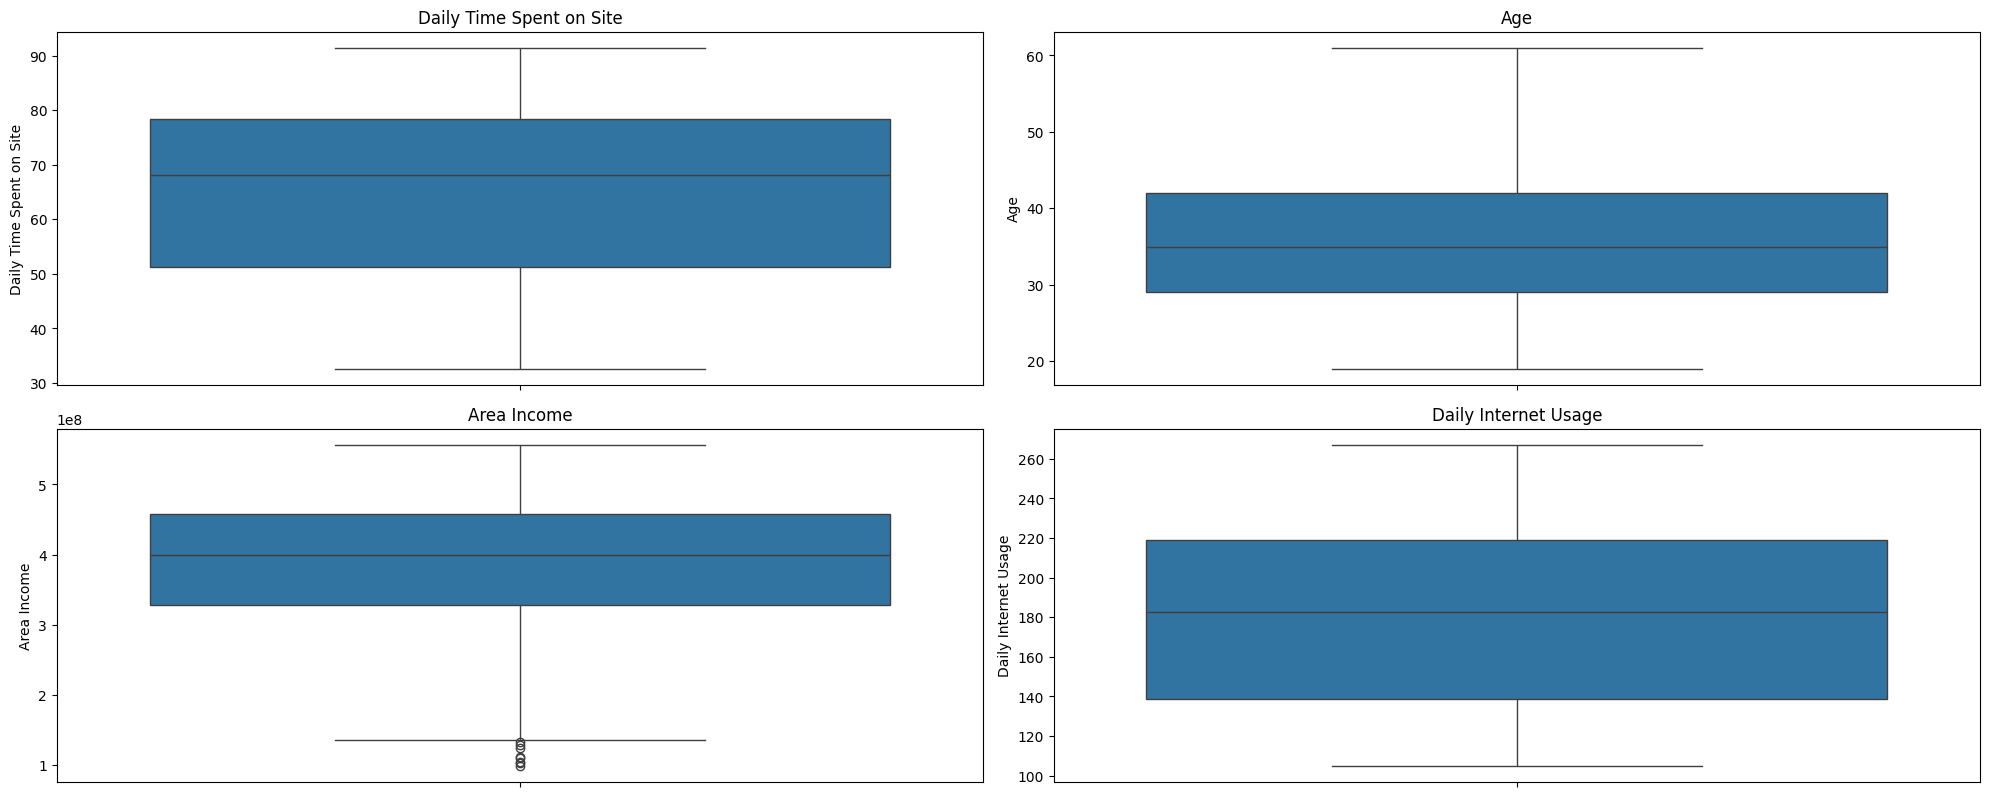

In [12]:
# Cek outlier Feature Numeric
num = num.drop('Unnamed: 0', errors='ignore')
plt.figure(figsize=(20, 12))
for i in range(len(num)):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(y=df[num[i]], orient='v')
    plt.title(num[i])
    plt.tight_layout()

plt.show()

Key Takeaways:
- Terdapat Outlier pada feature **Area Income**

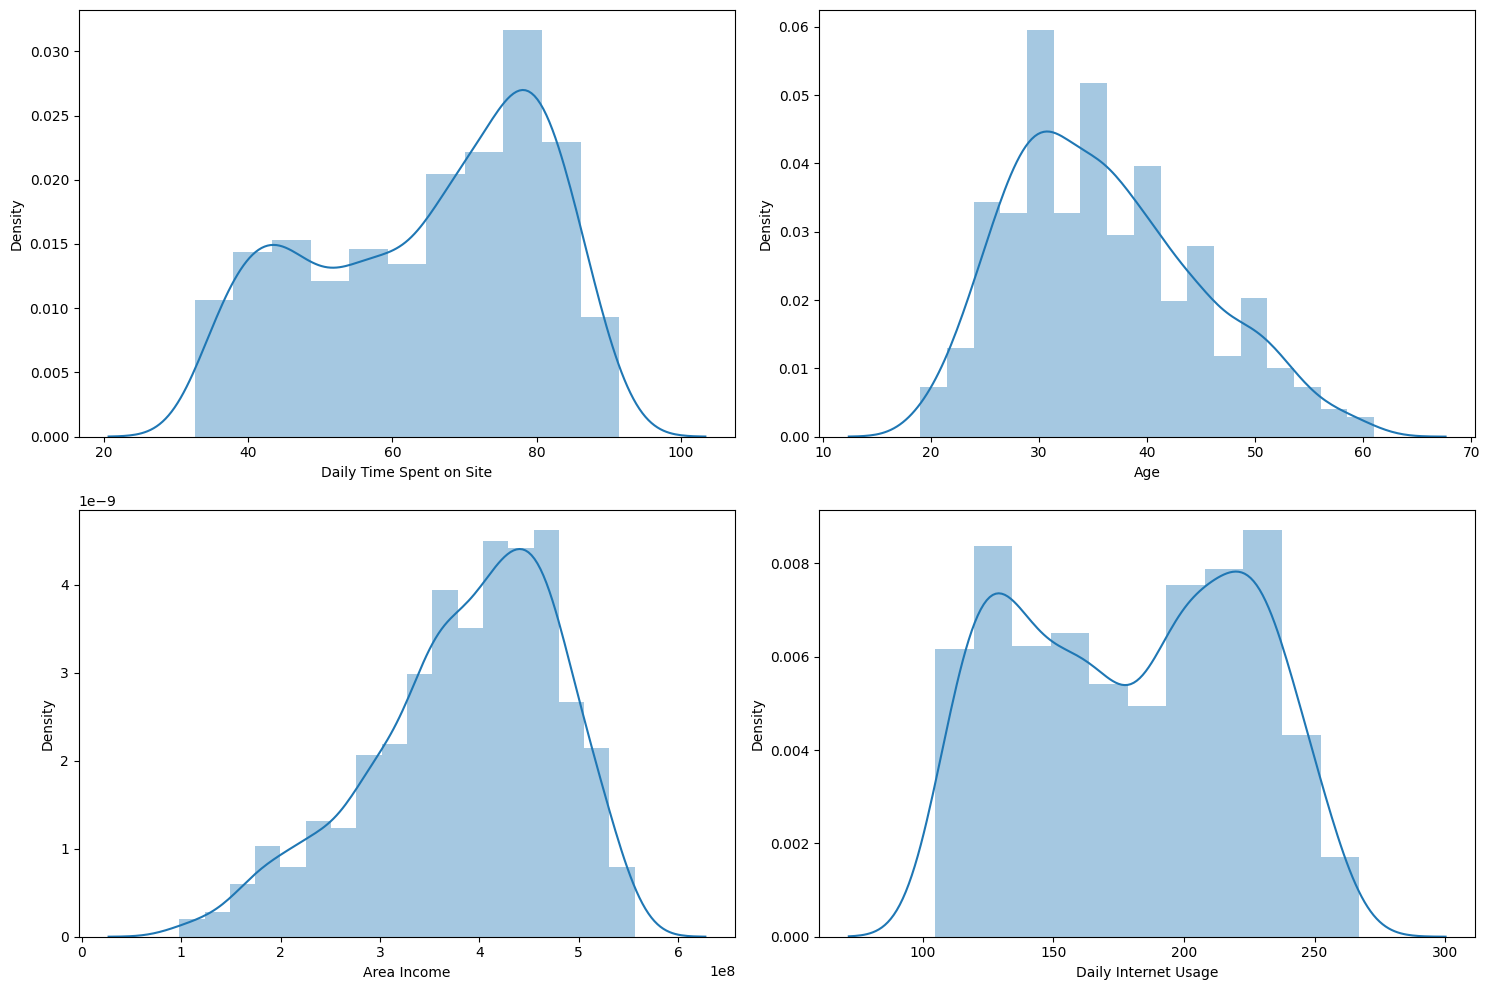

In [13]:
# Distribusi Feature Numeric
plt.figure(figsize=(15, 10))
for i in range(0, len(num)):
    plt.subplot(2, 2, i+1)
    sns.distplot(df[num[i]])
    plt.tight_layout()

Key Takeaways:
- Feature **Daily Time Spent on Site** berdistribusi negatively skewed
- Feature **Age** berdistribusi positively skewed
- Feature **Area Income** berdistribusi negatively skewed
- Feature **Daily** Internet Usage berdistirbusi normal

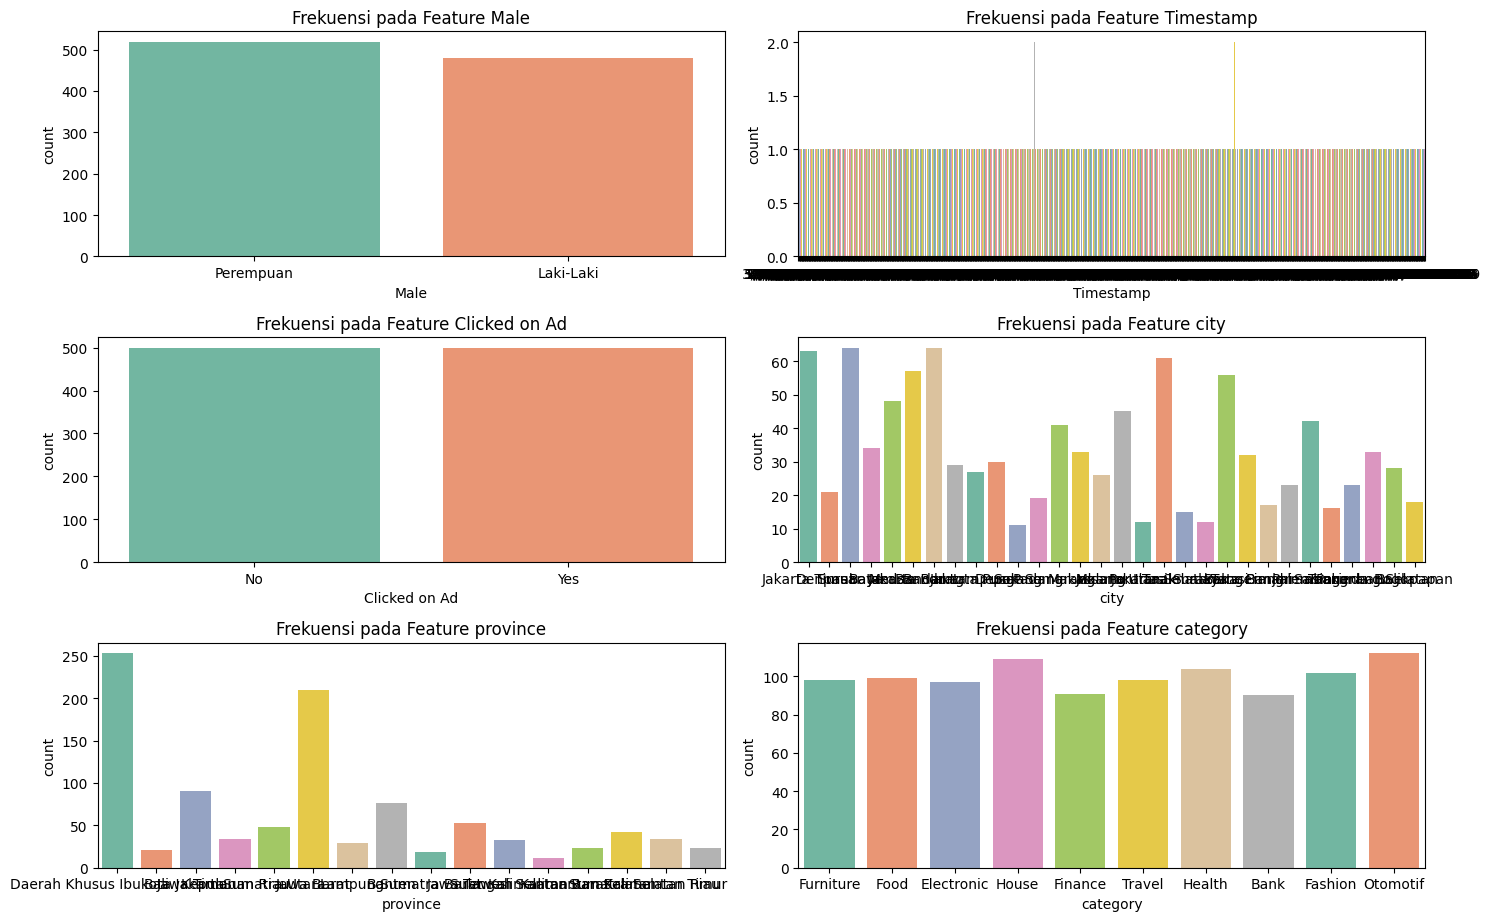

In [14]:
# Distriusi feature kategorikal
plt.figure(figsize=(15, 15))
for i in range(len(cat)):
    plt.subplot(5, 2, i + 1)
    sns.countplot(x=df[cat[i]], palette="Set2")
    plt.title(f'Frekuensi pada Feature {cat[i]}')
    plt.tight_layout()

plt.show()

Key Takeaways:
- Perempuan lebih banyak melakukan klik iklan

- Perbedaan tipis antara customer yang melakukan klik dan tidak terlihat cukup balance (seimbang)

- Category paling banyak diminati adalah Otomotif, House, Health, dan Fashion


# 6. Bivariate Analysis

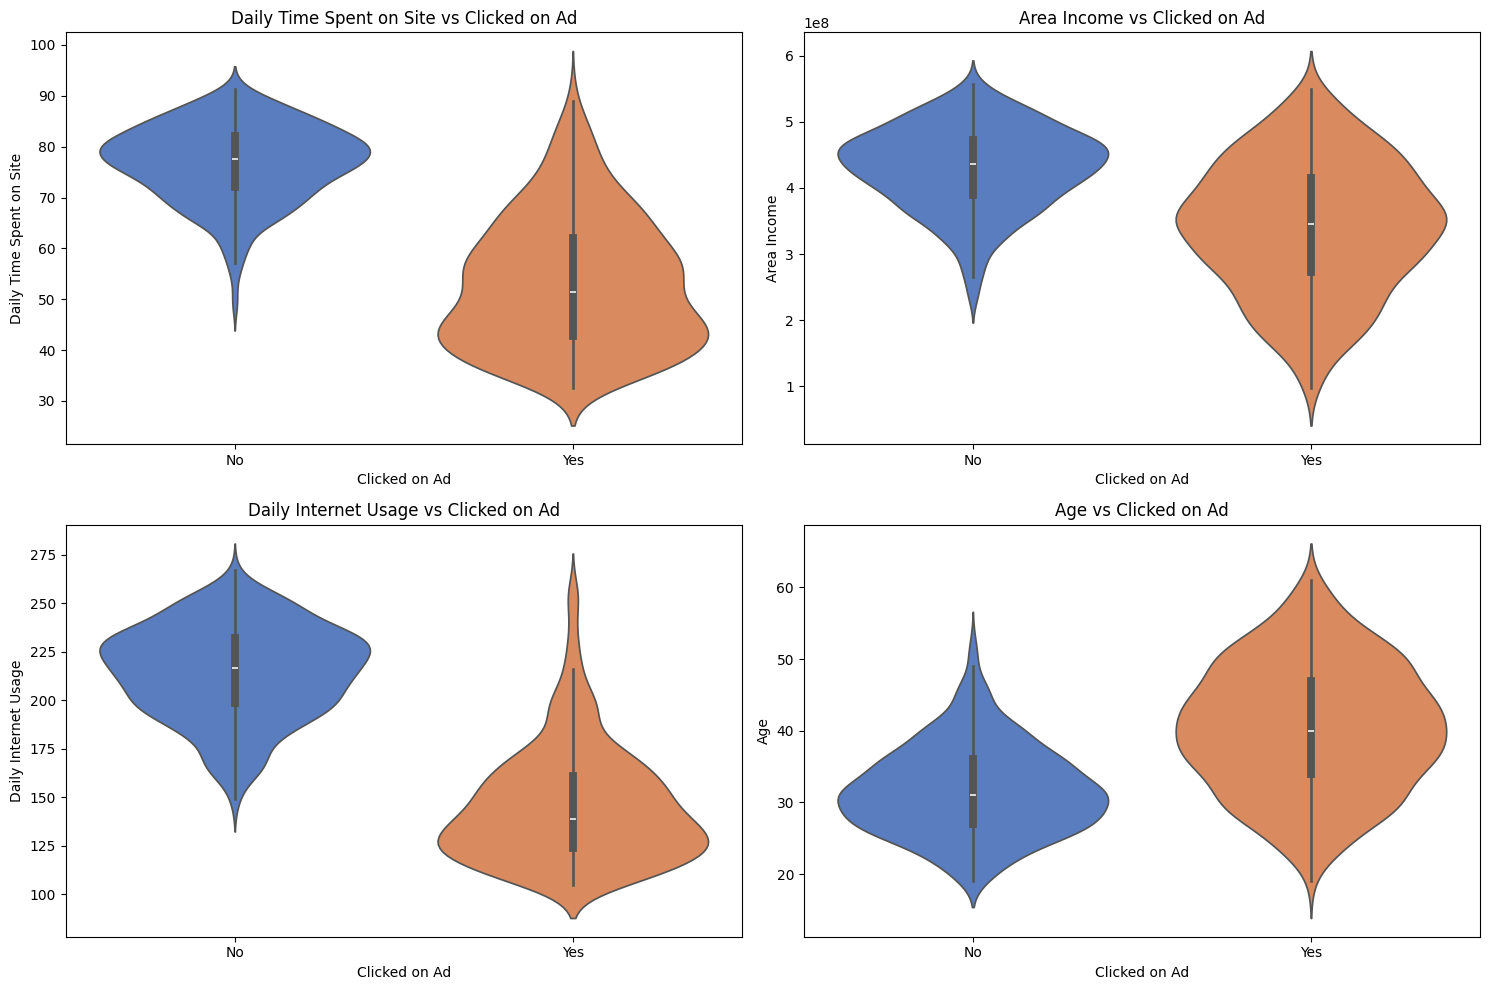

In [15]:
# Violin Plot
plt.figure(figsize=(15, 10))

# Daily Time Spent on Site vs Clicked on Ad
plt.subplot(2, 2, 1)
sns.violinplot(data=df, x='Clicked on Ad', y='Daily Time Spent on Site', palette="muted")
plt.title('Daily Time Spent on Site vs Clicked on Ad')

# Daily Internet Usage vs Clicked on Ad
plt.subplot(2, 2, 3)
sns.violinplot(data=df, x='Clicked on Ad', y='Daily Internet Usage', palette="muted")
plt.title('Daily Internet Usage vs Clicked on Ad')

# Age vs Clicked on Ad
plt.subplot(2, 2, 4)
sns.violinplot(data=df, x='Clicked on Ad', y='Age', palette="muted")
plt.title('Age vs Clicked on Ad')

# Area Income vs Clicked on Ad
plt.subplot(2, 2, 2)
sns.violinplot(data=df, x='Clicked on Ad', y='Area Income', palette="muted")
plt.title('Area Income vs Clicked on Ad')

plt.tight_layout()
plt.show()

Key Takeaways:

- Daily Time Spent on Site vs Clicked on Ad:
  
  Customer yang tidak mengklik iklan (No) cenderung menghabiskan lebih banyak waktu di situs, dengan distribusi yang lebih luas di bagian atas.
Pengguna yang mengklik iklan (Yes) menghabiskan waktu lebih sedikit di situs, dengan distribusi yang lebih kecil.

- Age vs Clicked on Ad:

  Customer dengan umur yang lebih tua cenderung melakukan klik pada iklan dibandingkan customer yang usia lebih muda.

- Area Income vs Clicked on Ad:

  Customer yang tidak mengklik iklan memiliki pendapatan area yang cenderung lebih tinggi, dengan distribusi yang lebih besar di bagian atas.

- Daily Internet Usage vs Clicked on Ad:

  Customer yang tidak mengklik iklan cenderung memiliki penggunaan internet harian yang lebih tinggi, dengan distribusi yang lebih besar.

# 7. Multivariate Analysis

In [16]:
# Menghitung korelasi antar kolom numerik
correlation_matrix = df[num].corr()
print(correlation_matrix)

                          Daily Time Spent on Site       Age  Area Income  \
Daily Time Spent on Site                  1.000000 -0.331424     0.308266   
Age                                      -0.331424  1.000000    -0.179343   
Area Income                               0.308266 -0.179343     1.000000   
Daily Internet Usage                      0.518294 -0.370481     0.338080   

                          Daily Internet Usage  
Daily Time Spent on Site              0.518294  
Age                                  -0.370481  
Area Income                           0.338080  
Daily Internet Usage                  1.000000  


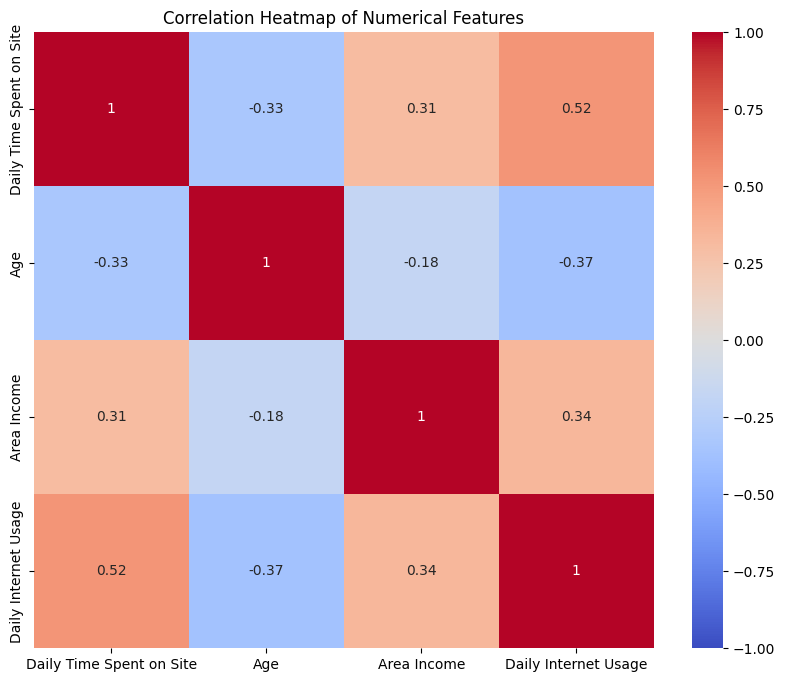

In [17]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[num].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

Key Takeaways:
- **Daily Time Spent on Site** memiliki korelasi positif yang cukup kuat dengan **Daily Internet Usage** (0.51), menunjukkan bahwa semakin lama seseorang menghabiskan waktu di internet, semakin lama mereka menghabiskan waktu di situs.

- **Age** memiliki korelasi negatif dengan **Daily Time Spent on Site** (-0.33) dan **Daily Internet Usage** (-0.37), menunjukkan bahwa pengguna yang lebih tua cenderung menghabiskan lebih sedikit waktu di situs dan internet secara keseluruhan.

- **Area Income** memiliki korelasi positif sedang dengan **Daily Time Spent on Site** (0.30) dan **Daily Internet Usage** (0.33), menunjukkan bahwa pengguna dari area dengan pendapatan lebih tinggi cenderung menghabiskan lebih banyak waktu di situs dan internet.

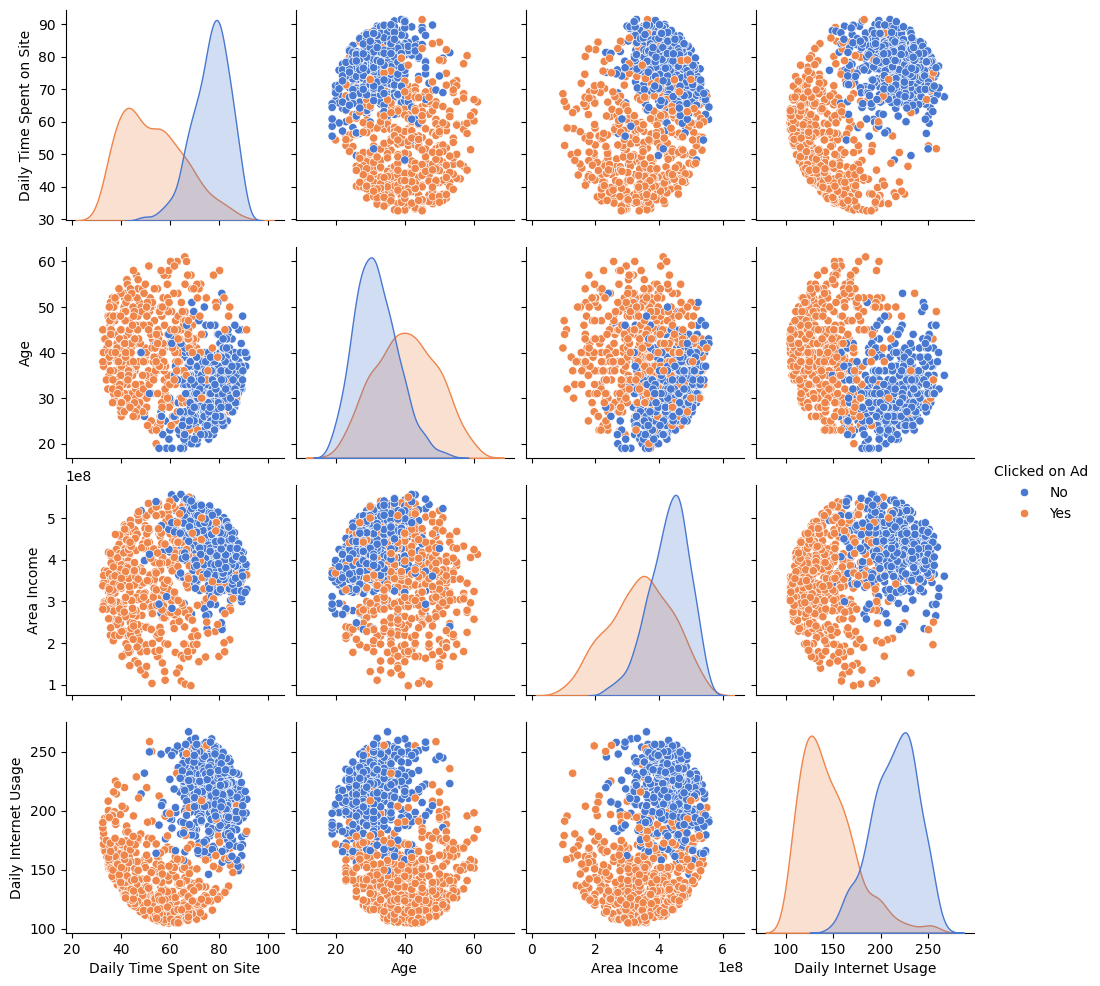

In [18]:
# Membuat Pairplot
df_plot = df[num].copy()
df_plot['Clicked on Ad'] = df['Clicked on Ad']
sns.pairplot(df_plot, hue='Clicked on Ad', palette="muted")
plt.show()

# 8. Predictive Power Score

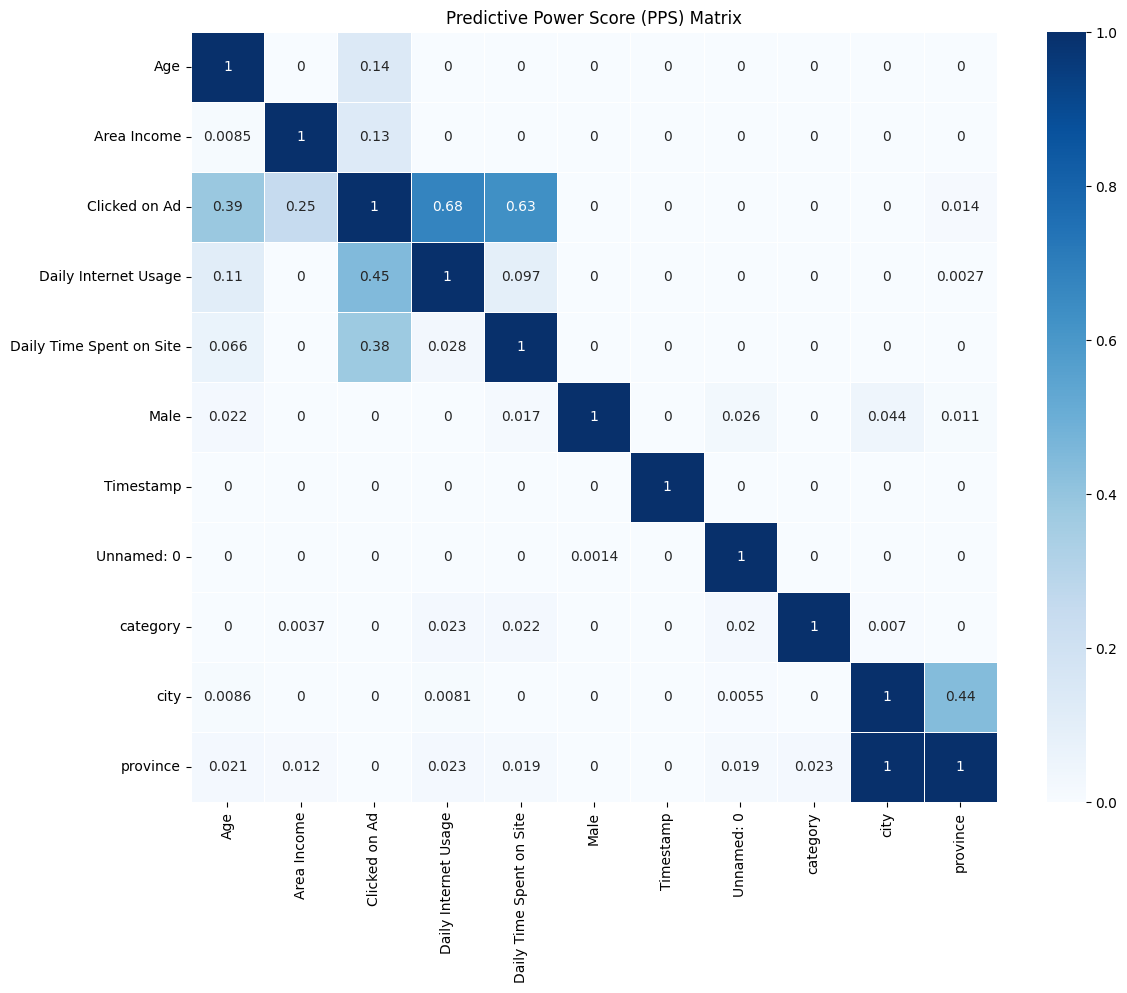

In [19]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung Predictive Power Score (PPS) untuk seluruh pasangan fitur dalam DataFrame
df_pps = pps.matrix(df)

# Membuat matriks dari hasil PPS untuk visualisasi
matrix_df = df_pps[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

# Menampilkan hasil PPS dalam bentuk heatmap
plt.figure(figsize=(13, 10))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)
plt.xlabel(None)
plt.ylabel(None)
plt.title('Predictive Power Score (PPS) Matrix')
plt.show()


Key Takeaways:
- Daily Internet Usage dan Daily Time Spent on Site memiliki kekuatan prediktif tinggi terhadap Clicked on Ad.
- Age memiliki pengaruh tapi berskala kecil.
- Fitur geografis seperti city dan province saling berkaitan.
- Fitur lain seperti Area Income dan Male memiliki pengaruh prediktif rendah atau nol.

# 9. Data Preprocsessing

## Handle Missing Value

In [20]:
df['Daily Time Spent on Site'].fillna(df['Daily Time Spent on Site'].mean(),inplace=True)
df['Area Income'].fillna(df['Area Income'].mean(),inplace=True)
df['Daily Internet Usage'].fillna(df['Daily Internet Usage'].mean(),inplace=True)
df['Male'].fillna(df['Male'].mode()[0],inplace=True)

## Extract Datetime Data

In [21]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
# Fungsi untuk mengekstrak hari dalam minggu
def extract_day_of_week(timestamp):
    return timestamp.day_name()
# Fungsi untuk mengekstrak hari dalam bulan
def extract_day_of_month(timestamp):
    return timestamp.day
# Fungsi untuk mengekstrak bulan
def extract_month(timestamp):
    return timestamp.month
# Menerapkan fungsi pada kolom 'Timestamp'
df['day_of_week'] = df['Timestamp'].apply(extract_day_of_week)
df['day_of_month'] = df['Timestamp'].apply(extract_day_of_month)
df['month'] = df['Timestamp'].apply(extract_month)
# Menghapus kolom 'Timestamp' setelah ekstraksi
df = df.drop(labels=['Timestamp'], axis=1)

In [22]:
counts = df.groupby(['day_of_week','Clicked on Ad'],as_index=False).size()

## Feature Selection

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  1000 non-null   float64
 2   Age                       1000 non-null   int64  
 3   Area Income               1000 non-null   float64
 4   Daily Internet Usage      1000 non-null   float64
 5   Male                      1000 non-null   object 
 6   Clicked on Ad             1000 non-null   object 
 7   city                      1000 non-null   object 
 8   province                  1000 non-null   object 
 9   category                  1000 non-null   object 
 10  day_of_week               1000 non-null   object 
 11  day_of_month              1000 non-null   int64  
 12  month                     1000 non-null   int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 101.7+ KB


Action:
- Drop feature Unamed 0 karena feature ini merupakan index number

In [24]:
df = df.drop(labels=['Unnamed: 0'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Male                      1000 non-null   object 
 5   Clicked on Ad             1000 non-null   object 
 6   city                      1000 non-null   object 
 7   province                  1000 non-null   object 
 8   category                  1000 non-null   object 
 9   day_of_week               1000 non-null   object 
 10  day_of_month              1000 non-null   int64  
 11  month                     1000 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 93.9+ KB


## Split Target and Features

In [25]:
# Memisahkan feature dan target
X = df.drop(labels=['Clicked on Ad'],axis=1)
y = np.where(df['Clicked on Ad']=='No',0,1)

## Get Dummies for All Categorical Features

In [26]:
# One-Hot Encoding
X_dummy = pd.get_dummies(X)

In [27]:
X_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 71 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Daily Time Spent on Site                1000 non-null   float64
 1   Age                                     1000 non-null   int64  
 2   Area Income                             1000 non-null   float64
 3   Daily Internet Usage                    1000 non-null   float64
 4   day_of_month                            1000 non-null   int64  
 5   month                                   1000 non-null   int64  
 6   Male_Laki-Laki                          1000 non-null   uint8  
 7   Male_Perempuan                          1000 non-null   uint8  
 8   city_Balikpapan                         1000 non-null   uint8  
 9   city_Bandar Lampung                     1000 non-null   uint8  
 10  city_Bandung                            1000 non-null   uint8

# 10. Modelling

## Splitting Dataset

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_dummy, y, test_size=0.3, random_state=123, stratify=y)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')


X_train shape: (700, 71)
X_test shape: (300, 71)
y_train shape: (700,)
y_test shape: (300,)


## Data Original

In [29]:
models = {
    "K-Nearest Neighbor": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

results = []

for name, model in models.items():
    start_time = time.time()

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    duration = time.time() - start_time
    results.append({
        "model_name": name,
        "model": model,
        "accuracy": accuracy,
        "recall": recall,
        "precision": precision,
        "duration": duration
    })

results_df = pd.DataFrame(results)
results_df

,model_name,model,accuracy,recall,precision,duration
0,K-Nearest Neighbor,KNeighborsClassifier(),0.696667,0.640000,0.721805,0.083481
1,Logistic Regression,LogisticRegression(max_iter=1000),0.500000,0.000000,0.000000,0.032050
2,Decision Tree,DecisionTreeClassifier(),0.933333,0.913333,0.951389,0.019893
3,Random Forest,"(DecisionTreeClassifier(max_features='sqrt', r...",0.950000,0.940000,0.959184,0.271192
4,Gradient Boosting,([DecisionTreeRegressor(criterion='friedman_ms...,0.933333,0.913333,0.951389,0.336467


Key Takeaways:
- Random Forest adalah model terbaik dalam percobaan ini dengan akurasi tertinggi (0.9433) dan keseimbangan yang sangat baik antara recall (0.9200) dan precision (0.9650). Model ini menunjukkan performa yang konsisten dan sangat andal untuk prediksi yang akurat.

- Decision Tree juga menunjukkan performa yang sangat baik, dengan akurasi yang hampir sama dengan Random Forest (0.9400) dan recall (0.9333) serta precision (0.9459) yang tinggi. Dengan waktu komputasi yang lebih cepat, Decision Tree adalah alternatif yang kuat.

- Gradient Boosting memberikan akurasi yang solid (0.9333) dengan precision tinggi (0.9514) dan recall yang baik (0.9133). Meskipun sedikit lebih lambat dibandingkan model lain, Gradient Boosting tetap menjadi pilihan yang andal jika akurasi menjadi prioritas.

- K-Nearest Neighbor (KNN) memiliki performa yang lebih rendah, dengan akurasi 0.6967 dan recall 0.6400. Meskipun precision relatif baik (0.7218), model ini mungkin kurang cocok untuk dataset ini dibandingkan dengan model yang lebih kompleks seperti Random Forest atau Decision Tree.

- Logistic Regression memiliki performa yang sangat rendah dalam percobaan ini, dengan akurasi 0.5000 dan recall serta precision yang nol. Hal ini menunjukkan bahwa Logistic Regression mungkin tidak cocok untuk dataset ini atau memerlukan tuning yang lebih baik untuk memberikan hasil yang berarti.

## Data Normalization

In [30]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_dummy)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=123, stratify=y)
models = {
    "K-Nearest Neighbor": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

results = []

for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    duration = time.time() - start_time
    results.append({
        "model_name": name,
        "model": model,
        "accuracy": accuracy,
        "recall": recall,
        "precision": precision,
        "duration": duration
    })

results_df2 = pd.DataFrame(results)
results_df2

,model_name,model,accuracy,recall,precision,duration
0,K-Nearest Neighbor,KNeighborsClassifier(),0.713333,0.660000,0.738806,0.008309
1,Logistic Regression,LogisticRegression(max_iter=1000),0.933333,0.886667,0.977941,0.026778
2,Decision Tree,DecisionTreeClassifier(),0.936667,0.926667,0.945578,0.015185
3,Random Forest,"(DecisionTreeClassifier(max_features='sqrt', r...",0.940000,0.933333,0.945946,0.288002
4,Gradient Boosting,([DecisionTreeRegressor(criterion='friedman_ms...,0.930000,0.913333,0.944828,0.315974


Key Takeaways:
- Random Forest adalah model terbaik karena memiliki akurasi tertinggi (0.9433) dan keseimbangan yang baik antara recall (0.9267) dan precision (0.9586). Ini menjadikannya pilihan yang sangat andal untuk klasifikasi, terutama ketika akurasi dan kualitas prediksi menjadi prioritas.

- Decision Tree juga dapat dipertimbangkan sebagai pilihan kedua terbaik. Dengan akurasi yang sangat mendekati Random Forest (0.9400), serta recall (0.9267) dan precision (0.9521) yang tinggi, Decision Tree menawarkan performa yang kuat dengan waktu komputasi yang lebih efisien.

- Logistic Regression tetap menjadi pilihan yang solid, terutama jika efisiensi komputasi menjadi pertimbangan utama. Dengan akurasi 0.9333 dan precision sangat tinggi (0.9779), model ini memberikan prediksi yang sangat andal, meskipun recall sedikit lebih rendah dibandingkan Random Forest dan Decision Tree.

- Gradient Boosting dapat dipilih jika prioritas utama adalah akurasi dan kualitas prediksi, meskipun membutuhkan waktu komputasi yang lebih lama dibandingkan dengan model lainnya. Dengan akurasi 0.9300, model ini masih merupakan pilihan yang kuat, tetapi perlu dipertimbangkan durasi eksekusinya.

- K-Nearest Neighbor (KNN) memiliki performa yang paling rendah di antara model-model yang diuji, dengan akurasi 0.7133 dan recall 0.6600. Model ini mungkin kurang ideal untuk dataset ini jika dibandingkan dengan model lainnya yang lebih kompleks.

# 11. Evaluation

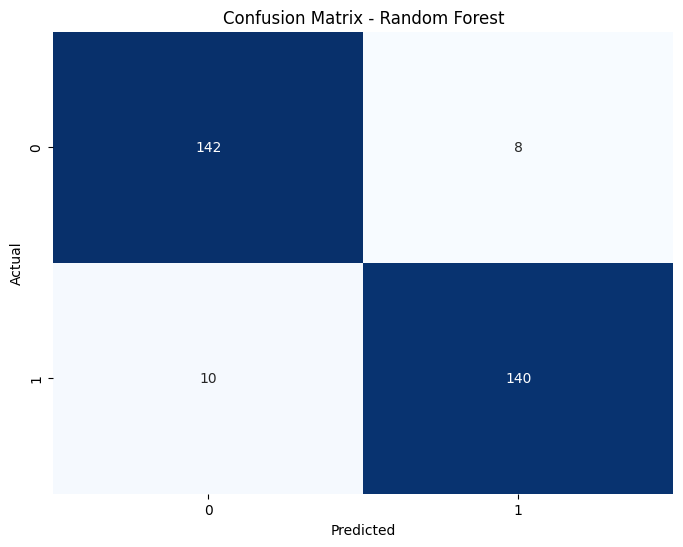

In [31]:
final_model = results_df2['model'][3]  # Asumsi model Random Forest ada di indeks ke-3
y_pred = final_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

# Membuat heatmap untuk confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

Key Takeawyas:
- Model Random Forest menunjukkan performa yang sangat baik, dengan sedikit kesalahan dalam prediksi baik untuk kelas positif maupun negatif. Dengan tingkat False Negatives yang rendah, model ini dapat diandalkan untuk aplikasi di mana mendeteksi kasus positif menjadi prioritas.

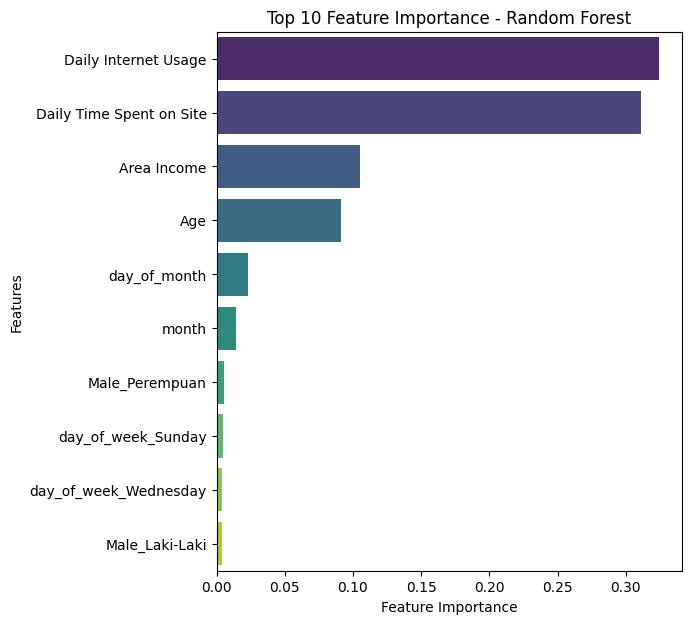

In [32]:
column_names = X_dummy.columns
final_model = results_df2['model'][3]

feature_imp = {
    'columns': column_names,
    'feature_imp': final_model.feature_importances_
}

df_feature_imp = pd.DataFrame(feature_imp)
df_feature_imp = df_feature_imp.sort_values(['feature_imp'], ascending=False).head(10)

plt.figure(figsize=(6, 7))
sns.barplot(x=df_feature_imp['feature_imp'], y=df_feature_imp['columns'], palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importance - Random Forest')
plt.show()

# 12. Business Recommendation

## Insights

Berdasarkan hasil Exploratory Data Analysis, berikut adalah beberapa faktor yang mempengaruhi Conversion Rate customer:

1. **Daily Time Spent on Site**:
  
  - User yang menghabiskan waktu lebih sedikit di situs cenderung lebih sering mengklik iklan. Ini bisa diartikan bahwa mereka lebih fokus pada iklan yang mereka lihat dan lebih cenderung untuk mengkliknya.

  
2. **Daily Internet Usage**:

  - User dengan penggunaan internet harian yang lebih kecil lebih sering mengklik iklan. Ini menunjukkan bahwa User yang kurang sering online mungkin lebih tertarik dengan iklan yang mereka lihat.

3. **Age**:

  - Rentang usia 30-60 tahun adalah yang paling banyak mengklik iklan. Ini menunjukkan bahwa kelompok usia ini lebih responsif terhadap iklan.


4. **Area Income**:
  - Customer dari area dengan pendapatan yang lebih rendah cenderung mengklik iklan lebih banyak. Ini mungkin menunjukkan bahwa mereka lebih responsif terhadap penawaran dan diskon.


Rekomendasi Bisnis:
1. Menargetkan user dengan usia rentang 30-60 tahun, menyesuaikan konten iklan yang akan ditampilkan untuk kelompok usia ini agar lebih menarik untuk di klik.

2. Memberikan iklan dalam bentuk promosi atau diskon kepada user dengan kategori income rendah - menengah, karena kelompok ini paling sering mengklik iklan.

3. Menayangkan iklan secara berkala dalam waktu tertentu dan memberikan tampilan iklan yang bervariasi kategorinya, untuk membuat user dengan daily time spent dan daily internet usage yang tinggi bisa mendapatkan promosi iklan yang sesuai hingga user tertarik untuk mengklik iklan.


## Simulation

In [33]:
# Jumlah kelas pada setiap data
jum_class = pd.Series(y_test).value_counts()
jum_class

,0
1,150
0,150


In [34]:
# Ukuran data test
X_test.shape

(300, 71)

**Without Machine Learning**

**Assumption:**
- Jumlah user pada data test: 300
- Jumlah kelas prediksi (Clicked on Ad = Yes): 150.
- Biaya iklan setiap User: Rp.5. 000
- Keuntungan setiap user yang convert: Rp.7.000

**Simulation:**
- Total Cost: 300 x Rp.5.000 =  1.500.000
- Total Revenue: 150 x Rp.7.000 = 1.050.000
- Total Profit: Rp.1.500.000 – Rp.1.050.000 = -450.000

Berdasrkan hasil simulasi tanpa menggunakan machine learning, perusahan akan mendapatkan **potential loss** sebesar Rp.450.000




**With Machine Learning**

**Assumption:**
- Jumlah user pada data test: 300
- Jumlah kelas prediksi (Clicked on Ad = Yes): 148
- Biaya iklan setiap User: Rp.5. 000
- Keuntungan setiap user yang convert: Rp.7.000

**Simulation:**
- Total Cost: 148 x Rp.5.000 =  Rp.740.000
- Total Revenue: 140 x Rp.7.000 = Rp.980.000
- Total Profit: Rp.980.000 – Rp.740.000 = Rp.240.000

Berdasrkan hasil simulasi menggunakan machine learning, perusahan akan mendapatkan potential revenue sebesar Rp240.000
